# Projet CoCoMa - Coordination de satellites
#### Tom Bouscarat et Chanattan Sok

### Ce notebook présente notre projet dans un format de présentation qui suit la trame donnée par le sujet.

### Préparation : Instances et planification des tâches
#### 1. Générateur aléatoire d'instances

In [1]:
from InstanceGenerator import *

In [2]:
nb_satellites = 3
nb_users = 3
nb_tasks = 5
seed = None
inst = generate_ESOP_instance(nb_satellites=nb_satellites, nb_users=nb_users, nb_tasks=nb_tasks, seed=seed)
print(inst.to_text())

[Parameters]
Satellites : 3
Exclusive users : 3
Tasks : 5

[Satellites]
s0 0 300 20 1
s1 0 300 20 1
s2 0 300 20 1

[Users]
u0 -
u1 s1:187-213, s1:22-54
u2 s0:171-204, s1:106-131
u3 s0:195-217, s1:90-120

[Tasks]
r_0 owner=u0 window=[139,178] duration=9 reward=3
r_1 owner=u1 window=[43,159] duration=9 reward=10
r_2 owner=u1 window=[46,202] duration=10 reward=2
r_3 owner=u1 window=[104,124] duration=9 reward=9
r_4 owner=u0 window=[90,121] duration=3 reward=6

[Observations]
o_r_0_0 task=r_0 owner=u0 sat=s0 window=[159,171] duration=9 reward=3
o_r_0_1 task=r_0 owner=u0 sat=s1 window=[139,168] duration=9 reward=3
o_r_1_0 task=r_1 owner=u1 sat=s1 window=[79,158] duration=9 reward=10
o_r_1_1 task=r_1 owner=u1 sat=s2 window=[43,154] duration=9 reward=10
o_r_2_0 task=r_2 owner=u1 sat=s1 window=[57,100] duration=10 reward=2
o_r_2_1 task=r_2 owner=u1 sat=s2 window=[99,201] duration=10 reward=2
o_r_2_2 task=r_2 owner=u1 sat=s0 window=[67,193] duration=10 reward=2
o_r_3_0 task=r_3 owner=u1 sat=s0 

#### 2. Méthode de planification pour un utilisateur : Greedy Solver 

In [3]:
from GreedySolver import *
from AuctionSolver import *

##### Planification locale pour l'utilisateur u0 et affichage de son plan.

In [4]:
plan = greedy_schedule_for_user(inst, user_id='u0')
print_user_plans({'u0': plan})

Planning pour l'utilisateur u0:
  Sur le satellite s0:
    > Observation o_r_4_3 (reward: 6)
    > Observation o_r_0_0 (reward: 3)
  Sur le satellite s1:
    > Observation o_r_4_1 (reward: 6)
    > Observation o_r_0_1 (reward: 3)
  Sur le satellite s2:
  Score total: 18



##### Temps de calcul pour greedy_schedule_for_user.

In [5]:
# Moyenne de temps d'exécution pour greedy_schedule_for_user pour différentes instances ESOP.
# Vérification de l'optimalité : TODO.
import time
import numpy as np
exec_times = []

for i in range(10):
    inst = generate_ESOP_instance(nb_satellites=3 + np.random.randint(5, 10), nb_users=5 + np.random.randint(5, 10), nb_tasks=50 + np.random.randint(0, 100), seed=None)
    start_time = time.time()
    plan = greedy_schedule_for_user(inst, user_id='u0')
    end_time = time.time()
    elapsed_time = end_time - start_time
    exec_times.append(elapsed_time)
print(f"Temps d'exécution moyen pour greedy_schedule_for_user: {sum(exec_times)/len(exec_times):.6f} secondes") # ordre de 10^-4 secondes.

Temps d'exécution moyen pour greedy_schedule_for_user: 0.001508 secondes


## Partie 1 : Optimisation de contraintes distribuées
#### 1. Génération du DCOP associé à une instance ESOP.

In [6]:
from DCOP import *

In [7]:
inst2 = generate_ESOP_instance(nb_satellites=3, nb_users=3, nb_tasks=20, seed=None)
dcop = generate_DCOP_instance(inst2)
print(dcop)

name: esop_dcop
objective: min
domains:
  binary:
    values:
    - 0
    - 1
agents:
- u1
- u2
- u3
- aux_3
- aux_4
- aux_5
- aux_6
- aux_7
- aux_8
- aux_9
- aux_10
- aux_11
- aux_12
- aux_13
- aux_14
- aux_15
- aux_16
- aux_17
- aux_18
- aux_19
- aux_20
- aux_21
- aux_22
- aux_23
- aux_24
- aux_25
- aux_26
- aux_27
- aux_28
- aux_29
- aux_30
- aux_31
- aux_32
- aux_33
- aux_34
- aux_35
- aux_36
- aux_37
- aux_38
- aux_39
- aux_40
- aux_41
- aux_42
- aux_43
- aux_44
- aux_45
- aux_46
- aux_47
- aux_48
- aux_49
- aux_50
- aux_51
- aux_52
- aux_53
- aux_54
- aux_55
- aux_56
- aux_57
- aux_58
- aux_59
- aux_60
- aux_61
- aux_62
- aux_63
- aux_64
- aux_65
- aux_66
- aux_67
- aux_68
- aux_69
- aux_70
- aux_71
- aux_72
- aux_73
- aux_74
variables:
  x_u2_o_r_0_0:
    domain: binary
    agent: u2
  x_u2_o_r_0_1:
    domain: binary
    agent: u2
  x_u3_o_r_0_2:
    domain: binary
    agent: u3
  x_u3_o_r_0_3:
    domain: binary
    agent: u3
  x_u1_o_r_1_0:
    domain: binary
    agent: u1
  

#### 2. Résolution du DCOP

In [8]:
res = solve_dcop(inst2)
# L'instance inst2 est directement transformée en DCOP. NB : est nécessaire PyDcop installé et accessible dans l'environnement.
print(res)


=== Résolution DCOP avec DPOP ===

> Génération du DCOP...
Validation des fonctions de contraintes...
Toutes les fonctions sont valides
> DCOP sauvegardé dans esop_dcop.yaml

> Informations du DCOP:
  - Nombre de variables: 24
  - Nombre de contraintes: 51

Lancement de DPOP...
Temps de résolution DPOP : 1.4821 secondes

> Sortie de DPOP:
--------------------------------------------------
{
  "agt_metrics": {
    "aux_10": {
      "activity_ratio": 0.09074153325181576,
      "count_ext_msg": {
        "_discovery_aux_10": 10,
        "x_u3_o_r_3_0": 2
      },
      "cycles": {
        "x_u3_o_r_3_0": 0
      },
      "size_ext_msg": {
        "_discovery_aux_10": 0,
        "x_u3_o_r_3_0": 16
      }
    },
    "aux_11": {
      "activity_ratio": 0.05833663992955763,
      "count_ext_msg": {
        "_discovery_aux_11": 10,
        "x_u3_o_r_6_0": 2
      },
      "cycles": {
        "x_u3_o_r_6_0": 0
      },
      "size_ext_msg": {
        "_discovery_aux_11": 0,
        "x_u3_o_r_

#### 3. Comparaison expérimentale (Centralized Greedy Solver vs SDCOP)

In [9]:
#from Main import *
#extensive_compare_greedy_vs_sdcop()

In [10]:
from AuctionSolver import *

In [19]:
import time

inst2 = generate_ESOP_instance(nb_satellites=3, nb_users=3, nb_tasks=10, seed=None)

# PSI
t0 = time.time()
plan_psi = solve_psi(inst2)
t1 = time.time()
scores_psi = assess_solution(inst2, plan_psi)
time_psi = t1 - t0

# SSI
t0 = time.time()
plan_ssi = solve_ssi(inst2)
t1 = time.time()
scores_ssi = assess_solution(inst2, plan_ssi)
time_ssi = t1 - t0

# Regret
t0 = time.time()
plan_regret = solve_ssi_regret(inst2)
t1 = time.time()
scores_regret = assess_solution(inst2, plan_regret)
time_regret = t1 - t0

print("=== Instance inst2 ===")
print("PSI : reward total =", sum(scores_psi.values()),
      "  temps =", time_psi, "s")
print("SSI : reward total =", sum(scores_ssi.values()),
      "  temps =", time_ssi, "s")
print("Regret : reward total =", sum(scores_regret.values()),
      "  temps =", time_regret, "s")
print("Détail PSI :", scores_psi)
print("Détail SSI :", scores_ssi)
print("Détail Regret :", scores_regret)

=== Instance inst2 ===
PSI : reward total = 76   temps = 0.0012009143829345703 s
SSI : reward total = 85   temps = 0.00020623207092285156 s
Regret : reward total = 93   temps = 0.0002288818359375 s
Détail PSI : {'u0': 23, 'u1': 29, 'u2': 7, 'u3': 17}
Détail SSI : {'u0': 23, 'u1': 29, 'u2': 16, 'u3': 17}
Détail Regret : {'u0': 23, 'u1': 29, 'u2': 24, 'u3': 17}


[ERREUR] u1 / s0 : o_r_9_1 planifiée en dehors de toute fenêtre d'exclusivité de u1.
[ERREUR] u1 / s1 : o_r_5_1 planifiée en dehors de toute fenêtre d'exclusivité de u1.
[ERREUR] u2 / s0 : o_r_2_0 planifiée en dehors de toute fenêtre d'exclusivité de u2.
[ERREUR] u2 / s1 : o_r_2_2 planifiée en dehors de toute fenêtre d'exclusivité de u2.
[ERREUR] u2 / s1 : o_r_4_1 planifiée en dehors de toute fenêtre d'exclusivité de u2.
[ERREUR] u2 / s2 : o_r_2_1 planifiée en dehors de toute fenêtre d'exclusivité de u2.
[ERREUR] u3 / s0 : o_r_8_2 planifiée en dehors de toute fenêtre d'exclusivité de u3.
[ERREUR] u3 / s0 : o_r_8_1 planifiée en dehors de toute fenêtre d'exclusivité de u3.
[ERREUR] u3 / s0 : o_r_6_0 planifiée en dehors de toute fenêtre d'exclusivité de u3.
[ERREUR] u3 / s0 : o_r_8_0 planifiée en dehors de toute fenêtre d'exclusivité de u3.
[ERREUR] u3 / s2 : o_r_6_1 planifiée en dehors de toute fenêtre d'exclusivité de u3.
[ECHEC] Le planning viole au moins une contrainte.
[OK] Le planni

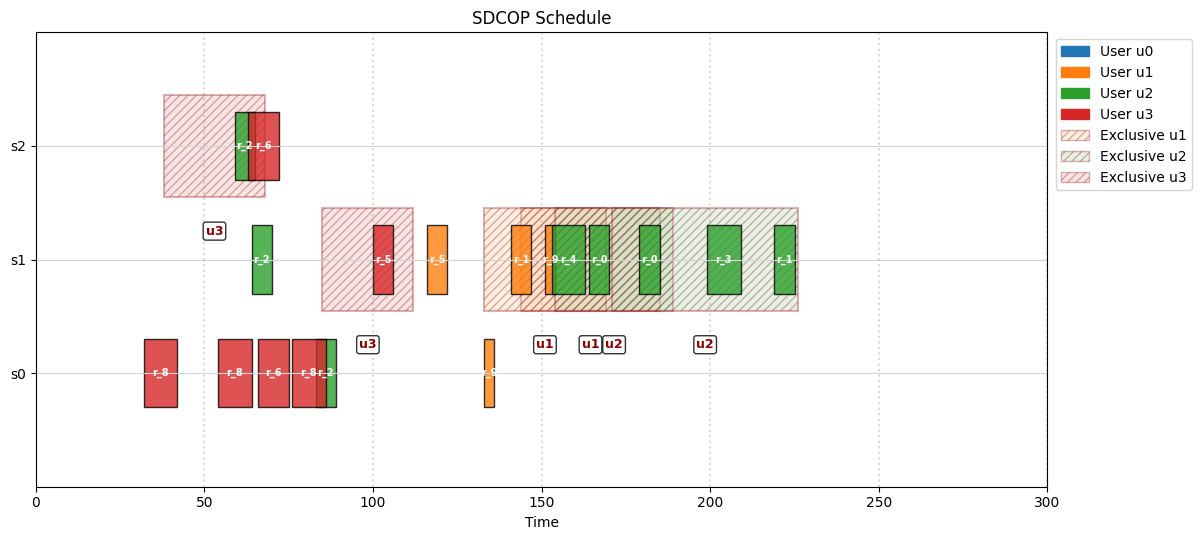

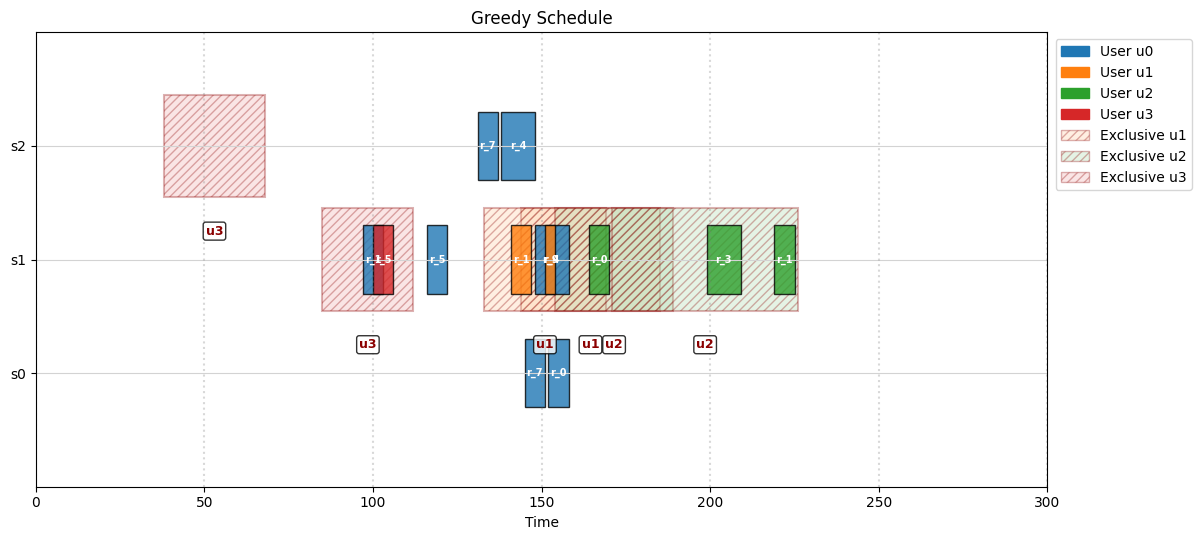

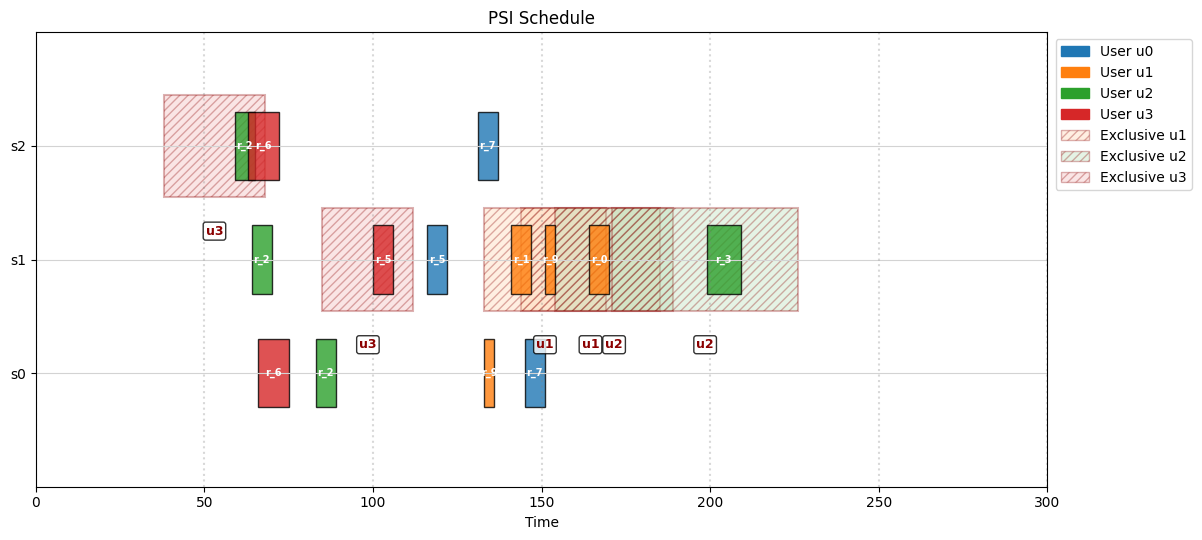

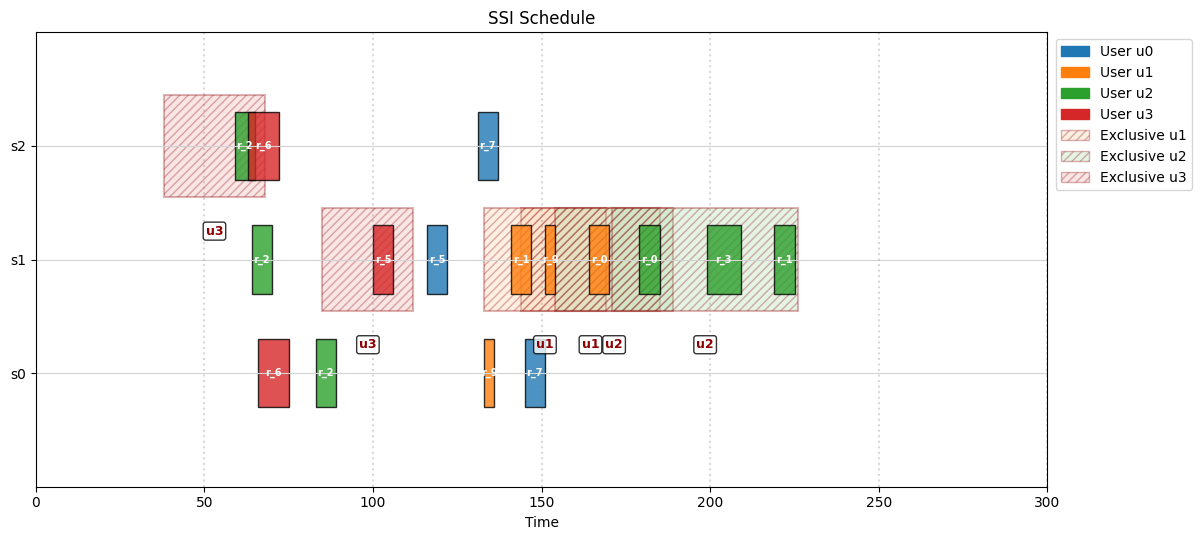

In [20]:
from StaticVisual import *

def greedy_schedule(inst):
    users_plan = {}
    for user in inst.users:
        users_plan[user.uid] = greedy_schedule_for_user(inst, user.uid)
    return users_plan
greedy_plan = greedy_schedule(inst2)

sdcop_plan, _, _ = sdcop_with_pydcop(inst2)

if(estRealisable(inst2, sdcop_plan)):
    print("SDCOP plan is realisable")
if(estRealisable(inst2, greedy_plan)):
    print("Greedy plan is realisable")
if(estRealisable(inst2, plan_psi)):
    print("PSI plan is realisable")
if(estRealisable(inst2, plan_ssi)):
    print("SSI plan is realisable")

plot_schedule(inst2, sdcop_plan, title="SDCOP Schedule")
plot_schedule(inst2, greedy_plan, title="Greedy Schedule")
plot_schedule(inst2, plan_psi, title="PSI Schedule")
plot_schedule(inst2, plan_ssi, title="SSI Schedule")

In [13]:
# Diagnostic : qui planifie quoi sur s1 ?
print("\n=== DIAGNOSTIC s1/u2 ===")
win_u2_s1 = next((w for u in inst2.users if u.uid == "u2" 
                  for w in u.exclusive_windows if w.satellite == "s1"), None)
if win_u2_s1:
    print(f"Fenêtre u2/s1: [{win_u2_s1.t_start}, {win_u2_s1.t_end}]")
    
    for method, plan in [("SDCOP", sdcop_plan), ("Greedy", greedy_plan), 
                        ("PSI", plan_psi), ("SSI", plan_ssi)]:
        print(f"\n{method} sur s1:")
        if "s1" in plan.get("u0", {}):
            for obs, t_start in plan["u0"]["s1"]:
                print(f"  u0: [{t_start}-{obs.t_end}] -> ", 
                      "❌ VIOLATION" if win_u2_s1.t_start <= t_start <= win_u2_s1.t_end else "OK")



=== DIAGNOSTIC s1/u2 ===


In [14]:
def compare_psi_ssi(n_instances=10, nb_satellites=3, nb_users=2, nb_tasks=20, horizon=300):
    """
    Compare PSI et SSI sur plusieurs instances générées avec generate_ESOP_instance.
    """
    import time
    from AuctionSolver import solve_psi, solve_ssi
    from InstanceGenerator import assess_solution
    
    results = {
        "psi_reward": [], "psi_time": [],
        "ssi_reward": [], "ssi_time": []
    }
    
    print(f"Comparaison PSI vs SSI sur {n_instances} instances")
    print(f"Paramètres: {nb_satellites}sats, {nb_users}users, {nb_tasks}tasks")
    
    for seed in range(n_instances):
        print(f"Instance {seed+1}/{n_instances}", end=" ")
        
        # Génération avec les bons paramètres
        inst = generate_ESOP_instance(
            nb_satellites=nb_satellites,
            nb_users=nb_users, 
            nb_tasks=nb_tasks,
            horizon=horizon,
            seed=seed
        )
        
        # PSI
        t0 = time.time()
        plan_psi = solve_psi(inst)
        time_psi = time.time() - t0
        scores_psi = assess_solution(inst, plan_psi)
        reward_psi = sum(scores_psi.values())
        results["psi_reward"].append(reward_psi)
        results["psi_time"].append(time_psi)
        print(".", end="")
        
        # SSI  
        t0 = time.time()
        plan_ssi = solve_ssi(inst)
        time_ssi = time.time() - t0
        scores_ssi = assess_solution(inst, plan_ssi)
        reward_ssi = sum(scores_ssi.values())
        results["ssi_reward"].append(reward_ssi)
        results["ssi_time"].append(time_ssi)
        print(".")
    
    import numpy as np
    print("\n" + "="*50)
    print("RÉSULTATS STATISTIQUES")
    print("="*50)
    print(f"Reward PSI:  {np.mean(results['psi_reward']):6.1f} ± {np.std(results['psi_reward']):5.1f}")
    print(f"Reward SSI:  {np.mean(results['ssi_reward']):6.1f} ± {np.std(results['ssi_reward']):5.1f}")
    print(f"Gain SSI/PSI: {(np.mean(results['ssi_reward'])/np.mean(results['psi_reward'])*100-100):+5.1f}%")
    print(f"Temps PSI:   {np.mean(results['psi_time']):7.3f}s ± {np.std(results['psi_time']):6.3f}s")
    print(f"Temps SSI:   {np.mean(results['ssi_time']):7.3f}s ± {np.std(results['ssi_time']):6.3f}s")
    print(f"Ratio T PSI/SSI: {np.mean(results['psi_time'])/np.mean(results['ssi_time']):5.2f}")
    
    return results


In [15]:
# Test rapide sur 10 instances petites
res = compare_psi_ssi(n_instances=10, nb_satellites=3, nb_users=2, nb_tasks=15)

# Test plus long avec instances plus grandes  
res_big = compare_psi_ssi(n_instances=5, nb_satellites=4, nb_users=3, nb_tasks=30)


Comparaison PSI vs SSI sur 10 instances
Paramètres: 3sats, 2users, 15tasks
Instance 1/10 Warning: Impossible d'ajouter l'observation initiale o_r_0_2
.
Instance 2/10 Warning: Impossible d'ajouter l'observation initiale o_r_2_2
.
Instance 3/10 Warning: Impossible d'ajouter l'observation initiale o_r_6_2
.
Instance 4/10 Warning: Impossible d'ajouter l'observation initiale o_r_6_1
.
Instance 5/10 Warning: Impossible d'ajouter l'observation initiale o_r_0_1
.
Instance 6/10 Warning: Impossible d'ajouter l'observation initiale o_r_2_1
.
Instance 7/10 Warning: Impossible d'ajouter l'observation initiale o_r_13_1
.
Instance 8/10 Warning: Impossible d'ajouter l'observation initiale o_r_8_1
.
Instance 9/10 Warning: Impossible d'ajouter l'observation initiale o_r_5_2
.
Instance 10/10 Warning: Impossible d'ajouter l'observation initiale o_r_1_1
.

RÉSULTATS STATISTIQUES
Reward PSI:    96.8 ±  21.8
Reward SSI:   101.3 ±  21.2
Gain SSI/PSI:  +4.6%
Temps PSI:     0.000s ±  0.000s
Temps SSI:     0.000

In [16]:
# Étude de scalabilité
sizes = [(3,2,10), (3,2,20), (3,2,30), (4,3,20)]
all_results = {}

for nb_sat, nb_users, nb_tasks in sizes:
    print(f"\n--- {nb_sat}sats/{nb_users}users/{nb_tasks}tasks ---")
    res = compare_psi_ssi(n_instances=8, 
                         nb_satellites=nb_sat, 
                         nb_users=nb_users, 
                         nb_tasks=nb_tasks)
    all_results[f"{nb_sat}_{nb_users}_{nb_tasks}"] = res



--- 3sats/2users/10tasks ---
Comparaison PSI vs SSI sur 8 instances
Paramètres: 3sats, 2users, 10tasks
Instance 1/8 Warning: Impossible d'ajouter l'observation initiale o_r_0_2
.
Instance 2/8 Warning: Impossible d'ajouter l'observation initiale o_r_2_2
.
Instance 3/8 Warning: Impossible d'ajouter l'observation initiale o_r_6_2
.
Instance 4/8 Warning: Impossible d'ajouter l'observation initiale o_r_6_1
.
Instance 5/8 Warning: Impossible d'ajouter l'observation initiale o_r_0_1
.
Instance 6/8 Warning: Impossible d'ajouter l'observation initiale o_r_2_1
.
Instance 7/8 Warning: Impossible d'ajouter l'observation initiale o_r_0_1
.
Instance 8/8 Warning: Impossible d'ajouter l'observation initiale o_r_8_1
.

RÉSULTATS STATISTIQUES
Reward PSI:    76.8 ±  22.7
Reward SSI:    81.0 ±  22.0
Gain SSI/PSI:  +5.5%
Temps PSI:     0.000s ±  0.000s
Temps SSI:     0.000s ±  0.000s
Ratio T PSI/SSI:  1.29

--- 3sats/2users/20tasks ---
Comparaison PSI vs SSI sur 8 instances
Paramètres: 3sats, 2users, 20ta